In [2]:
# Importing the required module for plotting data
import gsw  # See https://teos-10.github.io/GSW-Python/
import pycnv # See https://pypi.org/project/pycnv/
import matplotlib.pyplot as plt
import pylab as pl

# Defining the file path where the CNV file is located
# Choose either Seepraktikum 2023 data: https://bit.ly/3ut6NtV
#file_path = 'Messmethoden/Seepraktikum_2023/SBE19plus_01907321_2023_05_12_Cast36_loop_window.cnv'
# Or MSM121 data: https://bit.ly/3Ri19E2
#file_path = 'Messmethoden/msm121_profiles/MSM121_015_1db.cnv'
# Or MSM121 to-yo profiles: https://bit.ly/3GlQh1D
file_path = 'Messmethoden/MSM121_060/MSM121_060_001_05db.cnv'

# Load the data from the given file_path (may need to update to match your file location)
cnv = pycnv.pycnv(file_path)

# Print some info to the screen
print('Test if we are in the Baltic Sea (usage of different equation of state): ' + str(cnv.baltic))
print('Position of cast is: Longitude:', cnv.lon,'Latitude:',cnv.lat)
print('Time of cast was:', cnv.date)
print('Number of sensor entries (len(cnv.data.keys())):',len(cnv.data.keys()))
print('Names of sensor entries (cnv.data.keys()):',cnv.data.keys())

INFO:pycnv: Opening file: Messmethoden/MSM121_060/MSM121_060_001_05db.cnv


Test if we are in the Baltic Sea (usage of different equation of state): False
Position of cast is: Longitude: -42.666666666666664 Latitude: 47.06666666666667
Time of cast was: 2023-10-11 13:38:37+00:00
Number of sensor entries (len(cnv.data.keys())): 20
Names of sensor entries (cnv.data.keys()): dict_keys(['timeQ', 'prDM', 'p', 't090C', 'T0', 'c0mS/cm', 'C0', 'sbeox0ML/L', 'oxy0', 't190C', 'T1', 'c1mS/cm', 'C1', 'sbeox1ML/L', 'oxy1', 'latitude', 'longitude', 'timeS', 'sal11', 'flag'])


In [3]:
# Get data of entry
key0 = list(cnv.data.keys())[0]
data0 = cnv.data[key0]

# Get derived data:
keyd0 = list(cnv.cdata.keys())[0]
datad0 = cnv.cdata[keyd0]
# Get unit of derived data
datad0_unit = cnv.cunits[keyd0]

# Standard names are mapped to
# cnv.p,cnv.CT,cnv.T,cnv.SP,cnv.oxy
# units are _unit, e.g. cnv.p_unit

print(list(cnv.data.keys()))
print(list(cnv.cdata.keys()))

['timeQ', 'prDM', 'p', 't090C', 'T0', 'c0mS/cm', 'C0', 'sbeox0ML/L', 'oxy0', 't190C', 'T1', 'c1mS/cm', 'C1', 'sbeox1ML/L', 'oxy1', 'latitude', 'longitude', 'timeS', 'sal11', 'flag']
['SP00', 'SA00', 'pot_rho00', 'pt00', 'CT00', 'N200', 'pN200', 'SP11', 'SA11', 'pot_rho11', 'pt11', 'CT11', 'N211', 'pN211', 'p', 'oxy0', 'oxy1']


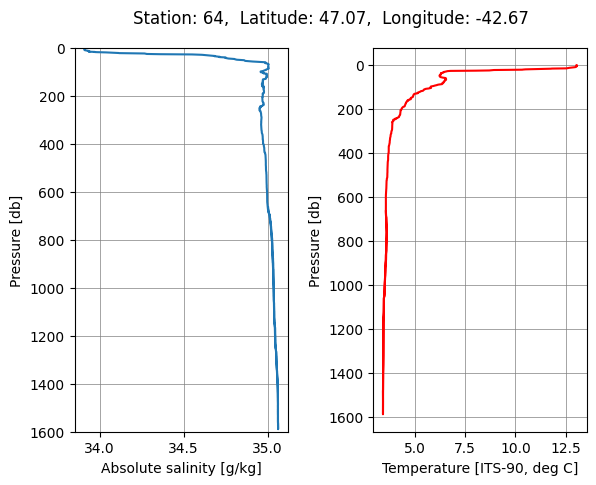

In [4]:
# Plot standard parameters
pl.figure(1)
pl.clf()
pl.subplot(1,2,1)
pl.plot(cnv.SA,cnv.p) # Note that pycnv has done the TEOS-10 conversion to SA for you using gsw
pl.xlabel('Absolute salinity [' + cnv.SA_unit + ']')
pl.ylabel('Pressure [' + cnv.p_unit + ']')
pl.gca().invert_yaxis()  # Question: What happens if you comment out this line?
pl.grid(color='grey', linestyle='-', linewidth=0.5)


# Step 1a: Add grid lines
pl.grid(color='grey', linestyle='-', linewidth=0.5)

# Step 1b: Limit the top of the plot to the surface (p=0)
pl.ylim(1600, 0)

# Step 1c: Add a second plot for temperature, to the right of the salinity plot
pl.subplot(1,2,2)
pl.plot(cnv.T,cnv.p, color='red') # Note that pycnv has done the TEOS-10 conversion to SA for you using gsw
pl.xlabel('Temperature [' + cnv.T_unit + ']')
pl.ylabel('Pressure [' + cnv.p_unit + ']')
pl.gca().invert_yaxis()
pl.grid(color='grey', linestyle='-', linewidth=0.5)
pl.subplots_adjust(right=1)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) #https://www.geeksforgeeks.org/how-to-set-the-spacing-between-subplots-in-matplotlib-in-python/

# Step 1d: Add a title to your figure, perhaps the station number, latitude and longitude
latitude = round(cnv.lat, 2)
longitude = round(cnv.lon, 2) #https://stackoverflow.com/questions/20457038/how-to-round-to-2-decimals-with-python
pl.suptitle('Station: 64,' +'  Latitude: '+str(latitude)+',  Longitude: '+str(longitude)) #title function needs strings
#one title for all subplots: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots


#see which attributes are in the file (https://code.activestate.com/pypm/cnv/)
#file = 'Messmethoden/MSM121_060/MSM121_060_001_05db.cnv'
#cnvdump file.cnv
#cnv2cdf file.cnv
#from cnv.fCNV import fCNV
#profile = fCNV('file')
#profile.attributes


# Step 1e: Print the figure to a *png file 
import os
desktop_pfad = os.path.join(os.path.expanduser('~'), 'Desktop') #zum Desktop
ordner_pfad = os.path.join(desktop_pfad, 'UNI', 'Semester5', 'Messmethoden' , 'Excercise_6') #zum Ordner dort
bild_pfad = os.path.join(ordner_pfad, '1_stat64_salt_temperature.png')
plt.savefig(bild_pfad, bbox_inches='tight')

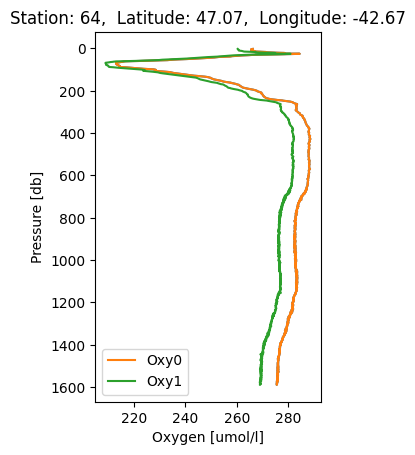

In [5]:
# Plotting profile data on the same axes
pl.subplot(1,2,2)
pl.plot(cnv.oxy,cnv.p)
pl.plot(cnv.cdata['oxy0'],cnv.p, label='Oxy0')
pl.plot(cnv.cdata['oxy1'],cnv.p, label='Oxy1')
pl.legend()
pl.xlabel('Oxygen [' + cnv.oxy_unit + ']')
pl.ylabel('Pressure [' + cnv.p_unit + ']')
pl.gca().invert_yaxis()
pl.title('Station: 64,' +'  Latitude: '+str(latitude)+',  Longitude: '+str(longitude)) #title function needs strings
bild_pfad = os.path.join(ordner_pfad, '2_stat64_oxygen_oneplot.png')
plt.savefig(bild_pfad, bbox_inches='tight')

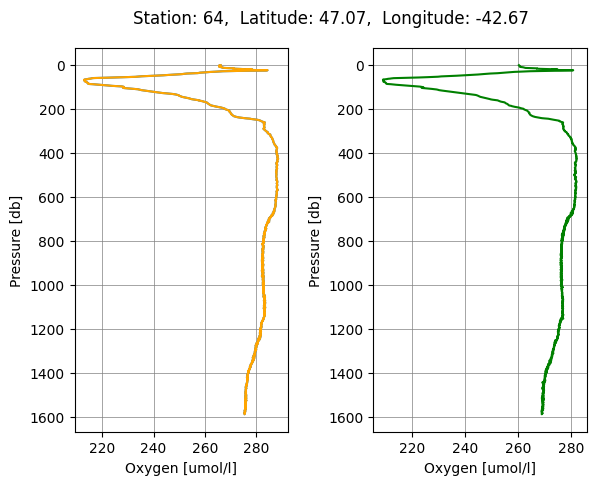

In [6]:
# Step 2a-e: Clean up the figure as above
pl.subplot(1,2,1)
pl.plot(cnv.oxy,cnv.p)
pl.plot(cnv.cdata['oxy0'],cnv.p, color='orange', label='Oxy0')
pl.xlabel('Oxygen [' + cnv.oxy_unit + ']')
pl.ylabel('Pressure [' + cnv.p_unit + ']')
pl.grid(color='grey', linestyle='-', linewidth=0.5) #grid
pl.gca().invert_yaxis()


pl.subplot(1,2,2)
pl.plot(cnv.cdata['oxy1'],cnv.p, color='green', label='Oxy1')
pl.xlabel('Oxygen [' + cnv.oxy_unit + ']')
pl.ylabel('Pressure [' + cnv.p_unit + ']')
pl.grid(color='grey', linestyle='-', linewidth=0.5)
pl.gca().invert_yaxis()
pl.subplots_adjust(right=1)
pl.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 

pl.suptitle('Station: 64,' +'  Latitude: '+str(latitude)+',  Longitude: '+str(longitude)) #title function needs strings


#savefig
bild_pfad = os.path.join(ordner_pfad, '3_stat64_oxygen_subplots.png')
plt.savefig(bild_pfad, bbox_inches='tight')

Step 2f (optional): Compute the apparent oxygen utilisation 
See: https://en.wikipedia.org/wiki/Apparent_oxygen_utilisation
you will need to calculate oxygen solubility (see the gsw documentation for O2_sol)

AOU = oxygen solubility - oxygen observed

- solubility (Löslichkeit)
- observed (gemessen)


length SA: 5022
shape CT: (5022,)

Absolute Salinity: [33.90895197 33.90876995 33.90885821 ... 35.00340943 35.00348409
 35.00347588]

Conservative temperature: [13.06506654 13.06279929 13.06182813 ...  3.50209207  3.50202965
  3.50206748]

Pressure: [  2.    2.5   3.  ... 667.5 667.  666.5]


Shape Lat_array: (5022,)
Shape Lon_array: (5022,)

['-42.666666666666664' '-42.666666666666664' '-42.666666666666664' ...
 '-42.666666666666664' '-42.666666666666664' '-42.666666666666664']
Oxygen solobility [umol/kg]: [259.90628089 259.9186404  259.92361504 ... 318.9510273  318.95132507
 318.95104986]

Observed Oxygen: [ umol/l ] [260.2786834  260.31441204 260.41713188 ... 280.30905274 280.30458666
 280.30012058]

Apparent oxygen utilisation: [-0.37240251 -0.39577164 -0.49351684 ... 38.64197455 38.6467384
 38.65092928]


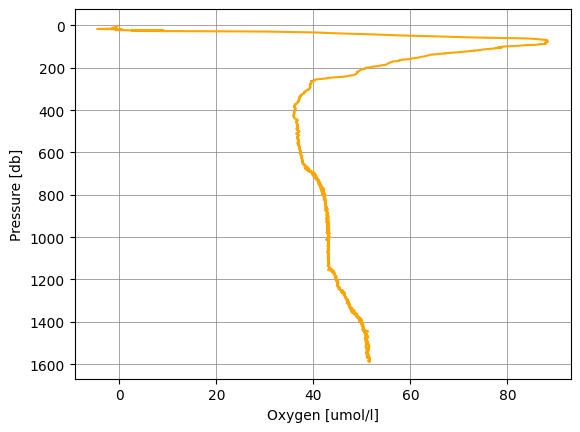

In [7]:
#calculate solubility: 
#https://www.teos-10.org/pubs/gsw/html/gsw_O2sol.html
import gsw
#from gsw import gsw_O2sol
#help(gsw_O2sol)

SA = cnv.SA
CT = cnv.CT
p = cnv.p
long = cnv.lon
lat = cnv.lat


print('length SA:',len(SA))
print('shape CT:', CT.shape)

print()
print('Absolute Salinity:', SA)
print()
print('Conservative temperature:', CT)
print()
print('Pressure:', p)
print()
#print(long)
#print(lat)
print()

#lat und lon into numpy arrays: https://stackoverflow.com/questions/5891410/numpy-array-initialization-fill-with-identical-values
import numpy as np
lat = np.full((5022,), str(lat))
long = np.full((5022,), str(long))
print('Shape Lat_array:', lat.shape)
print('Shape Lon_array:', long.shape)
print()

print(long)

oxygen_solubility = gsw.O2sol(cnv.SA,cnv.CT,cnv.p,cnv.lon,cnv.lat)

print('Oxygen solobility [umol/kg]:', oxygen_solubility) #Einheit: https://teos-10.github.io/GSW-Python/gsw_flat.html#
print()


#AOU = oxygen solubility - oxygen observed

oxygen_observed = cnv.cdata['oxy1']
print('Observed Oxygen:', '[',cnv.oxy_unit,']' , oxygen_observed) #Einheit nachgelesen eigentlich ml/l
print()

AOU = oxygen_solubility - oxygen_observed
print('Apparent oxygen utilisation:', AOU) #very high?


pl.plot(AOU,cnv.p, color='orange', label='Oxy0')
pl.xlabel('Oxygen [' + cnv.oxy_unit + ']')
pl.ylabel('Pressure [' + cnv.p_unit + ']')
pl.grid(color='grey', linestyle='-', linewidth=0.5) #grid
pl.gca().invert_yaxis()

In [8]:
cnv.cdata

{'SP00': array([33.74936452, 33.74918233, 33.74926914, ..., 34.83635505,
        34.83643015, 34.83642277]),
 'SA00': array([33.90895197, 33.90876995, 33.90885821, ..., 35.00340943,
        35.00348409, 35.00347588]),
 'pot_rho00': array([1025.41873726, 1025.41904745, 1025.41930764, ..., 1027.70867549,
        1027.70874077, 1027.70873054]),
 'pt00': array([13.04782952, 13.04556194, 13.04459434, ...,  3.50512592,
         3.50506415,  3.50510193]),
 'CT00': array([13.06506654, 13.06279929, 13.06182813, ...,  3.50209207,
         3.50202965,  3.50206748]),
 'N200': array([ 5.95923960e-06,  4.99635315e-06, -1.29438486e-05, ...,
         4.24813343e-07, -1.26638509e-06,  2.08483413e-07]),
 'pN200': array([  2.25,   2.75,   3.25, ..., 667.75, 667.25, 666.75]),
 'SP11': array([33.74945036, 33.74944953, 33.74969234, ..., 34.83591981,
        34.8359591 , 34.83613848]),
 'SA11': array([33.90903821, 33.90903842, 33.90928341, ..., 35.0029721 ,
        35.00301079, 35.00319023]),
 'pot_rho11': a

(5022,)

potential density from gsw function: [25.45125338 25.45172038 25.45218729 ... 26.82602208 26.82612389
 26.82622563]



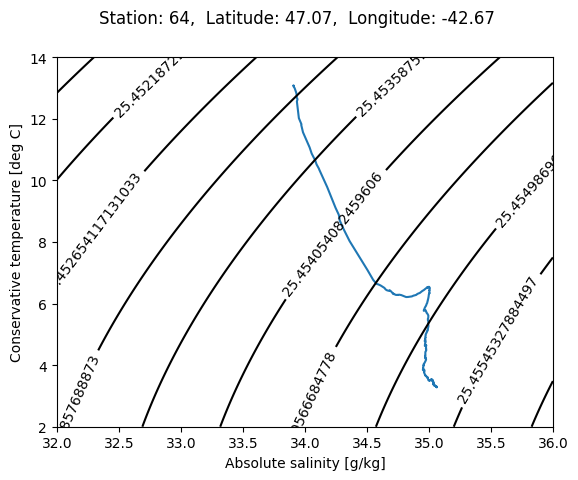

In [9]:
#2nd try TS diagram


# Make a T-S diagram
pl.clf()
pl.plot(cnv.SA,cnv.CT)
pl.xlabel('Absolute salinity [' + cnv.SA_unit + ']')
pl.ylabel('Conservative temperature [' + cnv.CT_unit + ']')

# Step 3a: Add contours of potential density
#    - Hint, you will need to create a vector of temperature and salinity spanning at 
#      least the ranges in the profile
#    - You will then need to use these gridded vectors to calculate potential density using the gsw toolbox
print(cnv.SA.shape)
print()
#source: https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
#x = cnv.SA
x = np.linspace(32.0,36.0,5000)
#y = cnv.CT
y  = np.linspace(2, 14, 5000)
X, Y = np.meshgrid(x, y)#builds two-dimensional grids from one-dimensional arrays (T+S to T&S)

#Z as potentail desity
#define function for calculating potential density from SA & CT (pre-defined gsw function)
def f(x,y):
    return gsw.density.sigma0(x, y)

#Z as potential density calculated from temperature and salinity two dimensional grids, type(Z):numpy ndarray, Z.shape:(5022, 5022) 
Z = f(X,Y) 
plot = plt.contour(X, Y, Z, colors='black', levels=10)

#potential density in new variable, type(pot_dens): numpy ndarray, pot_dens.shape: p22,)
pot_dens = gsw.density.sigma0(x, y)
print('potential density from gsw function:', pot_dens)
print()


# Step 3b: Add contour labels for the density

#countour adding (source: https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_label_demo.html)
format = {}
labels = pot_dens.tolist()
for lev, lab in zip(plot.levels, labels):
    format[lev]=lab

plt.clabel(plot, plot.levels,  inline=True, fmt=format, fontsize=10)




# Step 3c: Add a title
pl.suptitle('Station: 64,' +'  Latitude: '+str(latitude)+',  Longitude: '+str(longitude)) #title function needs strings



# Step 3d: Print the figure as a *png
bild_pfad = os.path.join(ordner_pfad, '4_stat64_T_S_diagram.png')
plt.savefig(bild_pfad, bbox_inches='tight')


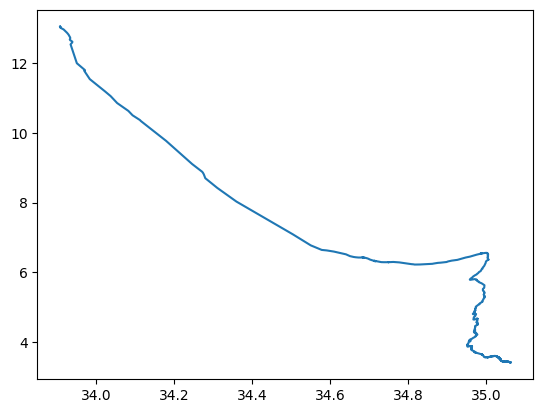

In [10]:
plt.plot(cnv.SA,cnv.T)

In [11]:
p = np.linspace(0,5000,5022) 

INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_001_1db.cnv
INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_002_1db.cnv
INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_003_1db.cnv
INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_014_1db.cnv
INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_015_1db.cnv
INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_016_1db.cnv
INFO:pycnv: Opening file: Messmethoden/msm121_profiles/MSM121_017_1db.cnv
/var/folders/nv/r4wmhgqj0fs2ynt13q7_01500000gn/T/ipykernel_24336/427099453.py:35: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


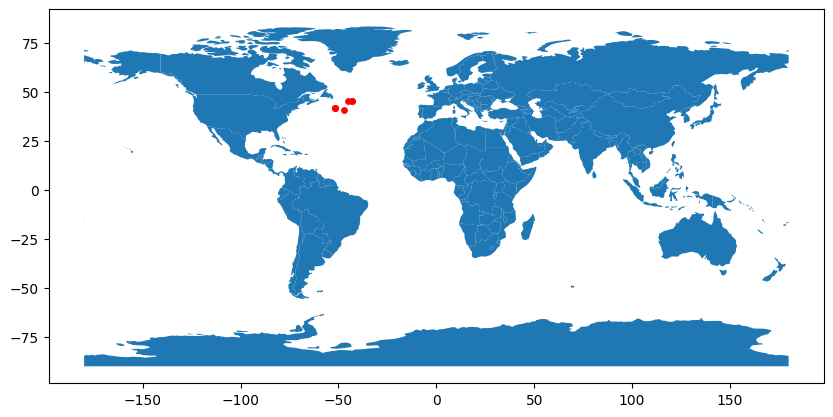

numpy.ndarray

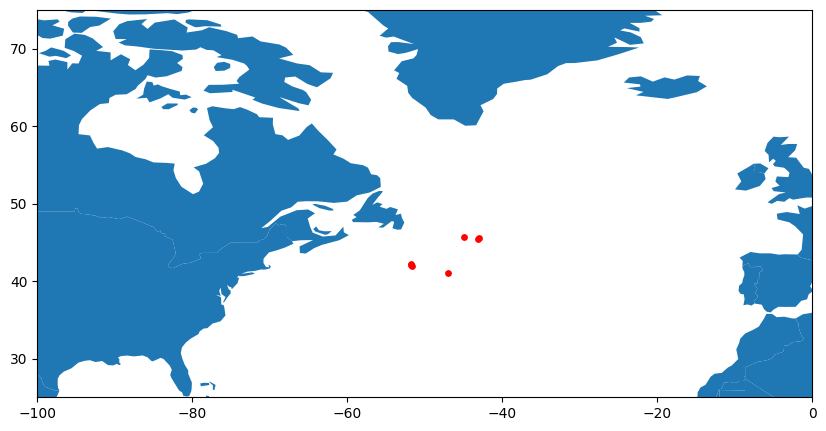

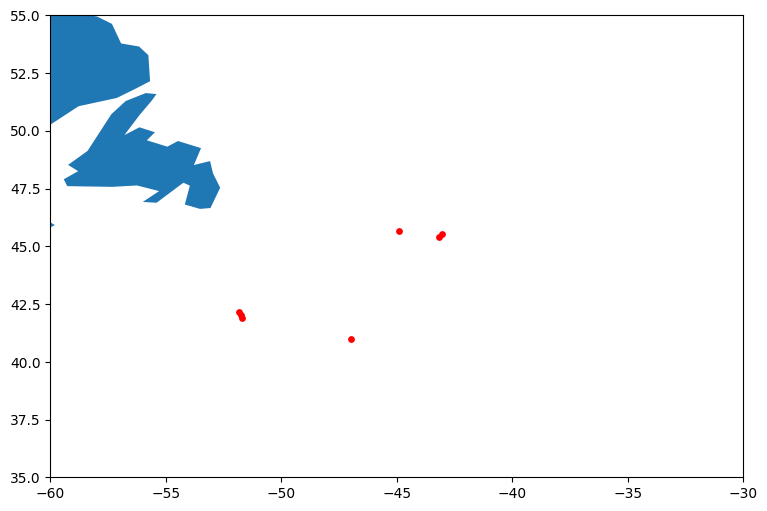

In [15]:
# Challenge 4: Load multiple cnv files into python.
cnv1 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_001_1db.cnv')
cnv2 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_002_1db.cnv')
cnv3 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_003_1db.cnv')
cnv4 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_014_1db.cnv')
cnv5 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_015_1db.cnv')
cnv6 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_016_1db.cnv')
cnv7 = pycnv.pycnv('Messmethoden/msm121_profiles/MSM121_017_1db.cnv')

# Step 4a: Plot a map of the stations

#first: values for station, Lon and lat (https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6)
stations = ['1', '2', '3', '14', '15', '16', '17']
latitudes = [cnv1.lat, cnv2.lat, cnv3.lat, cnv4.lat, cnv5.lat, cnv6.lat, cnv7.lat]
longitudes = [cnv1.lon, cnv2.lon, cnv3.lon, cnv4.lon, cnv5.lon, cnv6.lon, cnv7.lon]

#second: data to csv (https://www.delftstack.com/de/howto/python/write-list-to-csv-python/)
import pandas as pd
table = {"station": stations, "latitude": latitudes, "longitude": longitudes}
df = pd.DataFrame(table)
df.to_csv("lon_lat.csv")

#third: plot coordinates on geopandas map (https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6)
import geopandas as gpd
from geopandas import GeoDataFrame
import shapely
from shapely.geometry import Point
#define dataframe
df = pd.read_csv('lon_lat.csv', delimiter=',', skiprows=0, low_memory=False)
#define datapoints for map
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
#plot as geodataframe?
gdf = GeoDataFrame(df, geometry=geometry)   
#load worldmap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#use gdf (defined geodatframe with coordinates) abd plot onto map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
bild_pfad = os.path.join(ordner_pfad, '5_station_map.png')
plt.savefig(bild_pfad, bbox_inches='tight')
plt.show()

#again, but zoomed in
#use gdf (defined geodatframe with coordinates) abd plot onto map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.ylim(25,75)
plt.xlim(-100,0)
bild_pfad = os.path.join(ordner_pfad, '6_station_map_zoomed.png')
plt.savefig(bild_pfad, bbox_inches='tight')

#again, but zoomed in more
#use gdf (defined geodatframe with coordinates) abd plot onto map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.ylim(35,55)
plt.xlim(-60,-30)
bild_pfad = os.path.join(ordner_pfad, '7_station_map_zoomed_more.png')
plt.savefig(bild_pfad, bbox_inches='tight')


# Step 4b (optional): Add bathymetry 
#    - see e.g. GEBCO https://www.gebco.net/data_and_products/gridded_bathymetry_data/
#    - or ETOPO1.  Note these files are big when full resolution and global.
#    You will probably want to slice/prepare the data in a separate python notebook/file

# Step 4c: Load multiple stations into python
#    - Option one: Keep them all as separate variables (cnv1, cnv2, cnv3, etc)
#    - Option two: Combine them into a multidimensaionl np.ndarray
#      In order to combine them, they will need to be interpolated onto the same 
#      pressure grid (suggested 1 dbar grid).  

# Step 4d: Plot multiple temperature profiles on a single set of axes (see Step 1)

# Step 4e: Repeat for salinity

# Step 4f: Repeat for T-S diagrams (see Step 3)

# Noting the data type that cnv is using may help:
type(cnv.SA)

In [14]:
# Challenge 5: Only works with option two in challenge 4.

# Step 5a: Choose stations that are in a line (plot a map)

# Step 5b: Calculate buoyancy frequency N^2 = db/dz.  See gsw.Nsquared
#    - Plot this.  Note where it is large / small.

# Step 5b: Calculate distance between CTD profiles

# Step 5c: Calculate buoyancy b = -g\rho/\rho_0.  
#    - See e.g. Clement et al. 2023: https://doi.org/10.1175/JPO-D-22-0178.1

# Step 5d: Calculate the density gradient db/dx where x is the distance between stations

